## 1. Conecting with data

In [1]:
import pandas as pd

retail_df_2009 = pd.read_excel(r"..\..\utils\online_retail_II.xlsx", parse_dates=['InvoiceDate'], sheet_name='Year 2009-2010')
retail_df_2009["InvoiceDate"] = retail_df_2009["InvoiceDate"].dt.strftime("%m/%d/%Y")
retail_df_2009["InvoiceDate"] = pd.to_datetime(retail_df_2009["InvoiceDate"], format="%m/%d/%Y", errors='coerce')
print(retail_df_2009.head(2))

retail_df_2010 = pd.read_excel(r"..\..\utils\online_retail_II.xlsx", sheet_name='Year 2010-2011', parse_dates=["InvoiceDate"])
retail_df_2010["InvoiceDate"] = retail_df_2010["InvoiceDate"].dt.strftime("%m/%d/%Y")
retail_df_2010["InvoiceDate"] = pd.to_datetime(retail_df_2010["InvoiceDate"], format="%m/%d/%Y", errors='coerce')
print(retail_df_2010.head(2))

customers = pd.read_excel(r"..\..\utils\Customer Data.xlsx", sheet_name='Customer', header=3)
print(customers.head(5))



  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   

  InvoiceDate  Price  Customer ID         Country  
0  2009-12-01   6.95      13085.0  United Kingdom  
1  2009-12-01   6.75      13085.0  United Kingdom  
  Invoice StockCode                         Description  Quantity InvoiceDate  \
0  536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6  2010-12-01   
1  536365     71053                 WHITE METAL LANTERN         6  2010-12-01   

   Price  Customer ID         Country  
0   2.55      17850.0  United Kingdom  
1   3.39      17850.0  United Kingdom  
   Customer ID first_name last_name                   email  gender  \
0        17850      Roley     Fonzo     rfonzo0@blogger.com    Male   
1        13047      Alvie    Trymme      atrymme1@github.io    Male   
2        12583     Benton      Pont      bpont2@skyrock.

In [2]:
print(retail_df_2009["InvoiceDate"].isna().sum()) 
print(retail_df_2010["InvoiceDate"].isna().sum()) 

0
0


In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Class to display section titles for data exploration
class Interface:
    def __init__(self):
        pass

    def interfaz_title(self, title):
        print(f"""
-------------------------------
## {title} ##
-------------------------------
""")

# Class for plotting utilities
class Plotter:
    def __init__(self):
        pass

    def bar_chart(self, labels, values, color="skyblue", title="Chart", xlabel="X Axis", ylabel="Y Axis"):
        """Draws a bar chart"""
        plt.figure(figsize=(6, 4))
        plt.bar(labels, values, color=color)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def line_chart(self, x, y, color="green", marker="o", title="Chart", xlabel="X Axis", ylabel="Y Axis"):
        """Draws a line chart"""
        plt.figure(figsize=(6, 4))
        plt.plot(x, y, color=color, marker=marker)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def frequency_chart(self, data, color="skyblue", title="Frequency Chart",
                        xlabel="Categories", ylabel="Frequency", top_n=None):
        """Draws a frequency bar chart"""
        if not isinstance(data, pd.Series):
            data = pd.Series(data)

        freq = data.value_counts(dropna=False)

        if top_n:
            freq = freq.head(top_n)

        plt.figure(figsize=(6, 4))
        plt.bar(freq.index.astype(str), freq.values, color=color)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    def scatter_plot(self, x, y, data=None, color="dodgerblue", size=50,
                     alpha=0.7, title="Scatter Plot", xlabel=None, ylabel=None,
                     trendline=False):
        """Draws a scatter plot with optional trendline"""
        x_vals = data[x] if isinstance(x, str) and data is not None else pd.Series(x)
        y_vals = data[y] if isinstance(y, str) and data is not None else pd.Series(y)

        plt.figure(figsize=(8, 6))
        plt.scatter(x_vals, y_vals, c=color, s=size, alpha=alpha)
        plt.title(title)
        plt.xlabel(xlabel if xlabel else x)
        plt.ylabel(ylabel if ylabel else y)
        plt.grid(True, linestyle="--", alpha=0.6)

        if trendline:
            m, b = np.polyfit(x_vals, y_vals, 1)
            plt.plot(x_vals, m * x_vals + b, color="red", linewidth=2, label="Trendline")
            plt.legend()

        plt.tight_layout()
        plt.show()

# Class for data cleaning and exploration
class CleanData(Interface, Plotter):
    def __init__(self, df):
        self.df = df

    def normalize_column_names(self):
        self.interfaz_title("Normalizing Headers")
        self.df.columns = [col.lower().replace(" ", "_") for col in self.df.columns]
        print(self.df.columns.tolist(), "\n")

    def show_basic_information(self):
        self.interfaz_title("DataFrame Basic Information")
        print(self.df.info())
        print("Row count:", len(self.df))
        print("Column count:", len(self.df.columns), "\n")

    def show_information(self, fields: list):
        self.interfaz_title("Statistical Summary")
        print(self.df[fields].describe().round(2), "\n")

    def show_duplicates(self):
        self.interfaz_title("Duplicate Rows Count")
        print(self.df.duplicated().sum(), "\n")

    def show_missing_val(self):
        self.interfaz_title("Missing Values per Column")
        missing_df = self.df.isna().sum().reset_index()
        missing_df.columns = ["column_name", "missing_count"]
        print(missing_df, "\n")

    def show_how_many_negative_values(self, fields: list):
        self.interfaz_title("Negative Values in Specified Fields")
        for field in fields:
            negative_count = (self.df[field] < 0).sum()
            print(f"Field '{field}' has {negative_count} negative values.")

    def clean_unknown_chars(self, fields: list):
        self.interfaz_title("Cleaning Unknown Characters from Numeric Fields")
        for field in fields:
            self.df[field] = self.df[field].astype(str)
            self.df[field] = self.df[field].apply(lambda x: re.sub(r"[^\d.]", "", x))
            self.df[field] = pd.to_numeric(self.df[field], errors="coerce")
        print(f"Unknown characters cleaned from:\n{fields}\n")

    def clean_duplicates(self):
        self.interfaz_title("Removing Duplicate Rows")
        initial_count = len(self.df)
        self.df.drop_duplicates(inplace=True)
        final_count = len(self.df)
        removed_count = initial_count - final_count
        print(f"Removed {removed_count} duplicate rows.\n")

    def clean_negative_values(self, fields: list):
        self.interfaz_title("Removing Negative Values")
        for field in fields:
            self.df.loc[self.df[field] < 0, field] *= -1
        print(f"Negative values cleaned from:\n{fields}\n")

    def clean_missing_values(self, fields: list, method: str = "drop"):
        self.interfaz_title("Cleaning Missing Values")
        for field in fields:
            missing_before = self.df[field].isna().sum()

            if method == "drop":
                self.df.dropna(subset=[field], inplace=True)
            elif method == "fill_zero":
                self.df[field].fillna(0, inplace=True)
            elif method == "fill_mean":
                self.df[field].fillna(self.df[field].mean(), inplace=True)
            elif method == "fill_median":
                self.df[field].fillna(self.df[field].median(), inplace=True)

            missing_after = self.df[field].isna().sum()
            filled_count = missing_before - missing_after
            print(f"Field: '{field}' | Filled: {filled_count} | Still missing: {missing_after}")
        print("\n")

    def fill_missing_by_id(self, target_col: str, id_col: str):
        missing_before = self.df[target_col].isna().sum()

        id_to_value = (
            self.df[[id_col, target_col]]
            .dropna(subset=[target_col])
            .drop_duplicates(subset=[id_col])
            .set_index(id_col)[target_col]
            .to_dict()
        )

        self.df[target_col] = self.df.apply(
            lambda row: id_to_value.get(row[id_col], row[target_col])
            if pd.isna(row[target_col])
            else row[target_col],
            axis=1
        )

        missing_after = self.df[target_col].isna().sum()
        filled_count = missing_before - missing_after
        print(f"Column: '{target_col}' | Filled: {filled_count} | Still missing: {missing_after}")

    def capitalize_text_fields(self, fields: list):
        self.interfaz_title("Capitalizing Text Fields")
        for field in fields:
            self.df[field] = self.df[field].str.capitalize()
        print(f"Text fields capitalized:\n{fields}\n")

    def remove_outliers(self, columns, upper_limit=None, lower_limit=None, inplace=True):
        df = self.df.copy()
        if isinstance(columns, str):
            columns = [columns]

        initial_count = len(df)

        for col in columns:
            if col not in df.columns:
                print(f"Column '{col}' not found in DataFrame, skipping.")
                continue

            condition = pd.Series(True, index=df.index)
            if upper_limit is not None:
                condition &= df[col] <= upper_limit
            if lower_limit is not None:
                condition &= df[col] >= lower_limit

            removed = (~condition).sum()
            df = df[condition]
            print(f"Column '{col}': Removed {removed} outliers ({(removed / initial_count) * 100:.2f}% of rows).")

        if inplace:
            self.df = df
        else:
            return df

    def store_df(self, path: str, index: bool = False):
        self.interfaz_title("Saving Cleaned DataFrame to Excel")
        self.df.to_excel(path, index=index)
        print(f"DataFrame stored at: {path}\n")

    def restore_index(self):
        self.interfaz_title("Restoring DataFrame Index")
        self.df.reset_index(drop=True, inplace=True)
        print("DataFrame index restored.\n")

## 2. Exploratory data analisys

In [4]:
# Using the class to clean and explore the data
retail_2009 = CleanData(retail_df_2009)
retail_2010 = CleanData(retail_df_2010)
customers = CleanData(customers)

### 2.1. File retail_df_2009 df

EDA Results
- The dataframe contains 525,461 records across 8 columns.
- There are negative values in the ['quantity', 'price'] columns.
- The ['stockcode'] column has 2,782 missing records, representing 0.53% of the total data.
- The ['description'] column has 2,931 missing records, representing 0.56% of the total data.
- The ['customer_id'] column has 107,927 missing records, representing 20.54% of the total data.
- The dataframe contains 6,978 duplicate records, representing 1.33% of the total data.

Actions Taken
- Normalized column header values to remove extra spaces.
- Removed letters and special characters from the ['invoice', 'stockcode', 'customer_id'] columns.
- Capitalized the text in the ['description', 'country'] columns.
- Removed 6,978 duplicate records (1.29% of the total data).
- Used the “fill_missing_by_id” method to fill missing data from within the dataframe.
- Replaced negative values in ['quantity', 'price'], since these cannot be negative.
  - In this scenario I believe that these are human or system error
- Since missing data could not be fully recovered, and the missing values across the three columns accounted for approximately 22.5% of the total dataset, this portion was removed.
- Detected outliers through visualization and removed them using the “remove_outliers” method.
  - In This scenario I calculated the upper limit using quantiles and IQR

Results
- No duplicate records remain.
- No missing or null values remain.
- The cleaned dataframe now contains 349395 records across 8 columns, representing 66.49% of the original dataset.
- Data distribution was improved by removing outliers.

#### 2.1.1. EDA 

In [5]:
# Normalize column names in the dataframe
retail_2009.normalize_column_names()

# Remove unknown characters from numeric fields (cleans non-numeric symbols)
retail_2009.clean_unknown_chars(["invoice", "stockcode", "customer_id"])

# Capitalize text fields using the .capitalize() method
retail_2009.capitalize_text_fields(["description", "country"])

# Display basic dataframe information
retail_2009.show_basic_information()

# Display statistical summary for selected numeric fields
retail_2009.show_information(["quantity", "price"])

# Display missing values per column
retail_2009.show_missing_val()

# Display number of duplicate rows
retail_2009.show_duplicates()

# Display count of negative values in specified fields
retail_2009.show_how_many_negative_values(["invoice", "stockcode", "quantity", "price", "customer_id"])



-------------------------------
## Normalizing Headers ##
-------------------------------

['invoice', 'stockcode', 'description', 'quantity', 'invoicedate', 'price', 'customer_id', 'country'] 


-------------------------------
## Cleaning Unknown Characters from Numeric Fields ##
-------------------------------

Unknown characters cleaned from:
['invoice', 'stockcode', 'customer_id']


-------------------------------
## Capitalizing Text Fields ##
-------------------------------

Text fields capitalized:
['description', 'country']


-------------------------------
## DataFrame Basic Information ##
-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      525461 non-null  int64         
 1   stockcode    522679 non-null  float64       
 2   description  522530 non-null  object        


#### 2.1.2. Data cleaning retail_df_2009

In [6]:
# Remove duplicated records from the dataframe
retail_2009.clean_duplicates()

# Fill missing 'customer_id' values using 'invoice' as reference
retail_2009.fill_missing_by_id("customer_id", "invoice")

# Fill missing 'description' values using 'stockcode' as reference
retail_2009.fill_missing_by_id("description", "stockcode")

# Fill missing 'stockcode' values using 'customer_id' as reference
retail_2009.fill_missing_by_id("stockcode", "customer_id")

# Fill missing 'invoicedate' values using 'invoice' as reference
retail_2009.fill_missing_by_id("invoicedate", "invoice")

# Clean negative values in 'quantity' and 'price' fields
retail_2009.clean_negative_values(["quantity", "price"])

# Drop rows with missing values in 'stockcode' and 'customer_id'
retail_2009.clean_missing_values(["stockcode", "customer_id"], method="drop")


-------------------------------
## Removing Duplicate Rows ##
-------------------------------

Removed 6979 duplicate rows.

Column: 'customer_id' | Filled: 0 | Still missing: 107776
Column: 'description' | Filled: 2650 | Still missing: 281
Column: 'stockcode' | Filled: 1547 | Still missing: 1229
Column: 'invoicedate' | Filled: 0 | Still missing: 0

-------------------------------
## Removing Negative Values ##
-------------------------------

Negative values cleaned from:
['quantity', 'price']


-------------------------------
## Cleaning Missing Values ##
-------------------------------

Field: 'stockcode' | Filled: 1229 | Still missing: 0
Field: 'customer_id' | Filled: 106665 | Still missing: 0




In [7]:
# Display statistical summary before outlier removal
retail_2009.show_information(["quantity", "price"])

# --- Remove outliers in 'quantity' field ---
Q1 = retail_2009.df["quantity"].quantile(0.25)
Q3 = retail_2009.df["quantity"].quantile(0.75)
IQR = Q3 - Q1
lower_limit_qt = Q1 - 1.5 * IQR
upper_limit_qt = Q3 + 1.5 * IQR

retail_2009.remove_outliers(columns=["quantity"], upper_limit=upper_limit_qt)

# --- Remove outliers in 'price' field ---
Q1 = retail_2009.df["price"].quantile(0.25)
Q3 = retail_2009.df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_limit_p = Q1 - 1.5 * IQR
upper_limit_p = Q3 + 1.5 * IQR

retail_2009.remove_outliers(columns=["price"], upper_limit=upper_limit_p)

# Display statistical summary after outlier removal
retail_2009.show_information(["quantity", "price"])

# Restore index after cleaning
retail_2009.restore_index()


-------------------------------
## Statistical Summary ##
-------------------------------

        quantity      price
count  410588.00  410588.00
mean       13.96       3.52
std       101.93      42.60
min         1.00       0.00
25%         2.00       1.25
50%         5.00       1.95
75%        12.00       3.75
max     19152.00   10468.80 

Column 'quantity': Removed 26895 outliers (6.55% of rows).
Column 'price': Removed 34299 outliers (8.94% of rows).

-------------------------------
## Statistical Summary ##
-------------------------------

        quantity      price
count  349394.00  349394.00
mean        7.16       2.37
std         6.62       1.67
min         1.00       0.00
25%         2.00       1.25
50%         5.00       1.95
75%        12.00       2.95
max        27.00       7.50 


-------------------------------
## Restoring DataFrame Index ##
-------------------------------

DataFrame index restored.



#### 2.1.3. Validation

In [8]:
# Display basic information about the dataframe
retail_2009.show_basic_information()

# Display statistical summary for 'quantity' and 'price' fields
retail_2009.show_information(["quantity", "price"])

# Display count of missing values per column
retail_2009.show_missing_val()

# Display number of duplicate rows
retail_2009.show_duplicates()

# Display count of negative values in 'quantity' and 'price' fields
retail_2009.show_how_many_negative_values(["quantity", "price"])


-------------------------------
## DataFrame Basic Information ##
-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349394 entries, 0 to 349393
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      349394 non-null  int64         
 1   stockcode    349394 non-null  float64       
 2   description  349394 non-null  object        
 3   quantity     349394 non-null  int64         
 4   invoicedate  349394 non-null  datetime64[ns]
 5   price        349394 non-null  float64       
 6   customer_id  349394 non-null  float64       
 7   country      349394 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 21.3+ MB
None
Row count: 349394
Column count: 8 


-------------------------------
## Statistical Summary ##
-------------------------------

        quantity      price
count  349394.00  349394.00
mean        7.16   

#### 2.1.4. Basic statistical analisys

In [9]:
# Display basic information about the dataframe
retail_2009.show_basic_information()

# Display statistical summary for 'quantity' and 'price' fields
retail_2009.show_information(["quantity", "price"])

# Extract 'quantity' and 'price' columns for the most sold stockcode (e.g., 85099)
retail_2009_stock = retail_2009.df.loc[:, ["quantity", "price"]]

# Display info for the extracted subset
print("STOCK CODE 85099 INFO\n", retail_2009_stock.info())


-------------------------------
## DataFrame Basic Information ##
-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349394 entries, 0 to 349393
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      349394 non-null  int64         
 1   stockcode    349394 non-null  float64       
 2   description  349394 non-null  object        
 3   quantity     349394 non-null  int64         
 4   invoicedate  349394 non-null  datetime64[ns]
 5   price        349394 non-null  float64       
 6   customer_id  349394 non-null  float64       
 7   country      349394 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 21.3+ MB
None
Row count: 349394
Column count: 8 


-------------------------------
## Statistical Summary ##
-------------------------------

        quantity      price
count  349394.00  349394.00
mean        7.16   

#### Top 10 Sales per Country

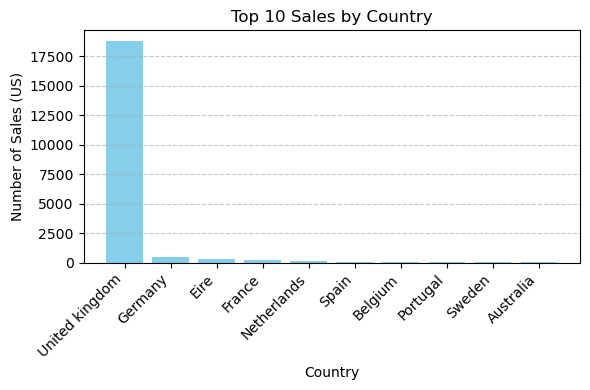

In [10]:
# Initialize the Plotter class
plotter = Plotter()

# Keep only the first occurrence of each invoice to represent unique sales
retail_2009_uniq_invoice = retail_2009.df.drop_duplicates(subset="invoice", keep="first")

# Plot the top 10 countries by number of unique sales (based on most sold stockcode 85099)
plotter.frequency_chart(
    retail_2009_uniq_invoice["country"],
    top_n=10,
    title="Top 10 Sales by Country",
    xlabel="Country",
    ylabel="Number of Sales (US)"
)

#### Top 10 Stock best sold

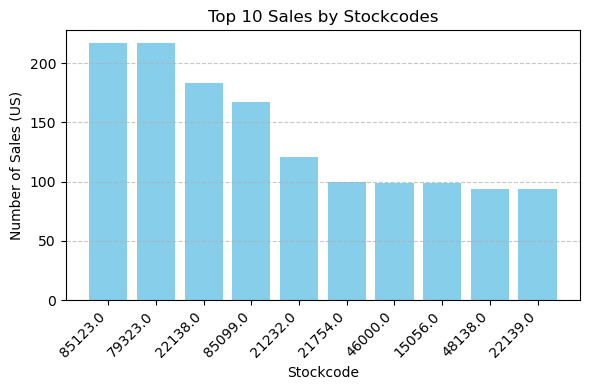

In [11]:
# Plot the top 10 most frequent stockcodes based on unique invoices
plotter.frequency_chart(
    retail_2009_uniq_invoice["stockcode"],
    top_n=10,
    title="Top 10 Sales by Stockcodes",
    xlabel="Stockcode",
    ylabel="Number of Sales (US)"
)

#### Price (US) vs Quantity

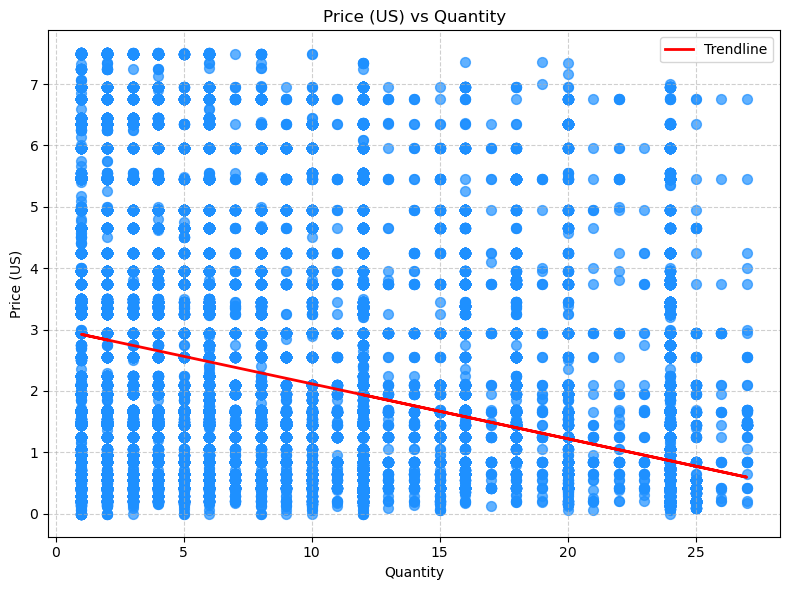

In [12]:
# Plot a scatter chart of price vs quantity for the cleaned retail dataset
retail_2009.scatter_plot(
    x="quantity",
    y="price",
    data=retail_2009_stock,
    title="Price (US) vs Quantity",
    xlabel="Quantity",
    ylabel="Price (US)",
    trendline=True
)

#### Insights

- **Top 3 Countries by Sales**
  - The leading countries in sales were the United Kingdom, Germany, and Eire.

- **Top 3 Best-Selling Products in 2010**
  - The most sold items were stockcodes **85123**, **79323**, and **22138**.

In [13]:
print((retail_2009.df['price'] == 0 ).sum())

29


#### 2.1.5. Save checked file

In [14]:
retail_2009.df.to_excel(r"..\..\utils\cleaned_retail_2009.xlsx", index=False)  

### 2.2. File retail_df_2010 df

EDA Results
- The dataframe contains 541,910 records across 8 columns.
- There are negative values in the ['quantity', 'price'] columns.
- The ['stockcode'] column has 2,797 missing records, representing 0.52% of the total data.
- The ['description'] column has 1,455 missing records, representing 0.27% of the total data.
- The ['customer_id'] column has 135,003 missing records, representing 24.93% of the total dataset.
- The dataframe contains 5,337 duplicate records, representing 0.98% of the total data.

Actions Taken
- Normalized column header values to remove extra spaces.
- Removed letters and special characters from the ['invoice', 'stockcode', 'customer_id'] columns.
- Capitalized the text in the ['description', 'country'] columns.
- Removed 5,337 duplicate records, representing 0.98% of the total dataset.
- Used the “fill_missing_by_id” method to fill missing data using existing information within the dataframe.
- Replaced negative values in ['quantity', 'price'], since these cannot be negative.
  - In this scenario I believe that these are human or system error
- Detected outliers through visualization and removed them using the “remove_outliers” method.
  - In This scenario I calculated the upper limit using quantiles and IQR

Results
- No duplicate records remain.
- No missing or null values remain.
- The cleaned dataframe now contains 401,559 records across 8 columns, representing 74.10% of the original dataset.

#### 2.2.1. EDA

In [15]:
# Normalize column names in the dataframe
retail_2010.normalize_column_names()

# Remove unknown characters from numeric fields (cleans non-numeric symbols)
retail_2010.clean_unknown_chars(["invoice", "stockcode", "customer_id"])

# Capitalize text fields using the .capitalize() method
retail_2010.capitalize_text_fields(["description", "country"])

# Display basic information about the dataframe
retail_2010.show_basic_information()

# Display statistical summary for 'quantity' and 'price' fields
retail_2010.show_information(["quantity", "price"])

# Display count of missing values per column
retail_2010.show_missing_val()

# Display number of duplicate rows
retail_2010.show_duplicates()

# Display count of negative values in specified fields
retail_2010.show_how_many_negative_values(["invoice", "stockcode", "quantity", "price", "customer_id"])


-------------------------------
## Normalizing Headers ##
-------------------------------

['invoice', 'stockcode', 'description', 'quantity', 'invoicedate', 'price', 'customer_id', 'country'] 


-------------------------------
## Cleaning Unknown Characters from Numeric Fields ##
-------------------------------

Unknown characters cleaned from:
['invoice', 'stockcode', 'customer_id']


-------------------------------
## Capitalizing Text Fields ##
-------------------------------

Text fields capitalized:
['description', 'country']


-------------------------------
## DataFrame Basic Information ##
-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      541910 non-null  int64         
 1   stockcode    539113 non-null  float64       
 2   description  540455 non-null  object        


#### 2.2.2. Data cleaning retail_df_2010

In [16]:
# Remove duplicated records from the dataframe
retail_2010.clean_duplicates()

# Fill missing 'customer_id' values using 'invoice' as reference
retail_2010.fill_missing_by_id("customer_id", "invoice")

# Fill missing 'description' values using 'stockcode' as reference
retail_2010.fill_missing_by_id("description", "stockcode")

# Fill missing 'stockcode' values using 'customer_id' as reference
retail_2010.fill_missing_by_id("stockcode", "customer_id")

# Clean negative values in 'quantity' and 'price' fields
retail_2010.clean_negative_values(["quantity", "price"])

# Drop rows with missing values in 'stockcode' and 'customer_id'
retail_2010.clean_missing_values(["stockcode", "customer_id"], method="drop")


-------------------------------
## Removing Duplicate Rows ##
-------------------------------

Removed 5338 duplicate rows.

Column: 'customer_id' | Filled: 0 | Still missing: 135003
Column: 'description' | Filled: 1359 | Still missing: 96
Column: 'stockcode' | Filled: 1771 | Still missing: 1020

-------------------------------
## Removing Negative Values ##
-------------------------------

Negative values cleaned from:
['quantity', 'price']


-------------------------------
## Cleaning Missing Values ##
-------------------------------

Field: 'stockcode' | Filled: 1020 | Still missing: 0
Field: 'customer_id' | Filled: 133994 | Still missing: 0




In [17]:
# Display statistical summary before outlier removal
retail_2010.show_information(["quantity", "price"])

# --- Remove outliers in 'quantity' field ---
Q1 = retail_2010.df["quantity"].quantile(0.25)
Q3 = retail_2010.df["quantity"].quantile(0.75)
IQR = Q3 - Q1
lower_limit_qt = Q1 - 1.5 * IQR
upper_limit_qt = Q3 + 1.5 * IQR

retail_2010.remove_outliers(columns=["quantity"], upper_limit=upper_limit_qt)

# --- Remove outliers in 'price' field ---
Q1 = retail_2010.df["price"].quantile(0.25)
Q3 = retail_2010.df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_limit_p = Q1 - 1.5 * IQR
upper_limit_p = Q3 + 1.5 * IQR

retail_2010.remove_outliers(columns=["price"], upper_limit=upper_limit_p)

# Display statistical summary after outlier removal
retail_2010.show_information(["quantity", "price"])

# Restore index after cleaning
retail_2010.restore_index()


-------------------------------
## Statistical Summary ##
-------------------------------

        quantity      price
count  401558.00  401558.00
mean       13.54       3.45
std       250.23      69.28
min         1.00       0.00
25%         2.00       1.25
50%         6.00       1.95
75%        12.00       3.75
max     80995.00   38970.00 

Column 'quantity': Removed 26155 outliers (6.51% of rows).
Column 'price': Removed 35510 outliers (9.46% of rows).

-------------------------------
## Statistical Summary ##
-------------------------------

        quantity      price
count  339893.00  339893.00
mean        7.50       2.20
std         6.77       1.55
min         1.00       0.00
25%         2.00       1.25
50%         6.00       1.65
75%        12.00       2.95
max        27.00       7.50 


-------------------------------
## Restoring DataFrame Index ##
-------------------------------

DataFrame index restored.



#### 2.2.3 Validation

In [18]:
# Display basic information about the dataframe
retail_2010.show_basic_information()

# Display statistical summary for 'quantity' and 'price' fields
retail_2010.show_information(["quantity", "price"])

# Display count of missing values per column
retail_2010.show_missing_val()

# Display number of duplicate rows
retail_2010.show_duplicates()

# Display count of negative values in 'quantity' and 'price' fields
retail_2010.show_how_many_negative_values(["quantity", "price"])


-------------------------------
## DataFrame Basic Information ##
-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339893 entries, 0 to 339892
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      339893 non-null  int64         
 1   stockcode    339893 non-null  float64       
 2   description  339893 non-null  object        
 3   quantity     339893 non-null  int64         
 4   invoicedate  339893 non-null  datetime64[ns]
 5   price        339893 non-null  float64       
 6   customer_id  339893 non-null  float64       
 7   country      339893 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 20.7+ MB
None
Row count: 339893
Column count: 8 


-------------------------------
## Statistical Summary ##
-------------------------------

        quantity      price
count  339893.00  339893.00
mean        7.50   

#### 2.2.4. Basic statistical analisys

In [19]:
# Display basic information about the dataframe
retail_2010.show_basic_information()

# Display statistical summary for 'quantity' and 'price' fields
retail_2010.show_information(["quantity", "price"])

# Extract 'quantity' and 'price' columns for analysis (e.g., for stockcode 85099)
retail_2010_stock = retail_2010.df.loc[:, ["quantity", "price"]]

# Display info for the extracted subset
print("STOCK CODE 85099\n", retail_2010_stock.info())


-------------------------------
## DataFrame Basic Information ##
-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339893 entries, 0 to 339892
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      339893 non-null  int64         
 1   stockcode    339893 non-null  float64       
 2   description  339893 non-null  object        
 3   quantity     339893 non-null  int64         
 4   invoicedate  339893 non-null  datetime64[ns]
 5   price        339893 non-null  float64       
 6   customer_id  339893 non-null  float64       
 7   country      339893 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 20.7+ MB
None
Row count: 339893
Column count: 8 


-------------------------------
## Statistical Summary ##
-------------------------------

        quantity      price
count  339893.00  339893.00
mean        7.50   

#### Top 10 sales by Countries

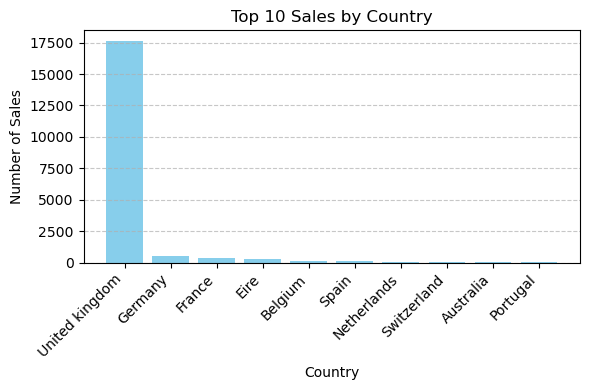

In [20]:
# Initialize the Plotter class
plotter = Plotter()

# Keep only the first occurrence of each invoice to represent a unique sale
retail_2010_uniq_invoice = retail_2010.df.drop_duplicates(subset="invoice", keep="first")

# Plot the top 10 countries by number of unique sales
plotter.frequency_chart(
    retail_2010_uniq_invoice["country"],
    top_n=10,
    title="Top 10 Sales by Country",
    xlabel="Country",
    ylabel="Number of Sales"
)

#### Top 10 sales by Stock codes

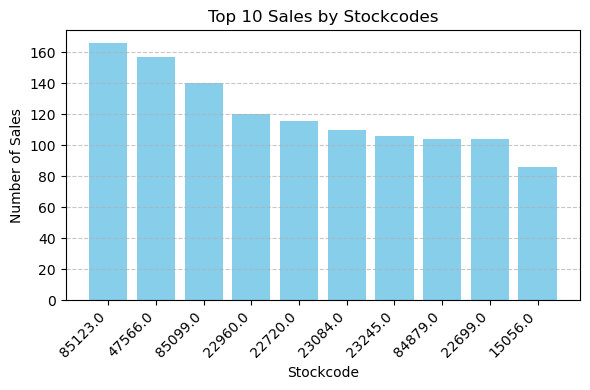

In [21]:
# Plot the top 10 most frequent stockcodes based on unique invoices
retail_2010.frequency_chart(
    retail_2010_uniq_invoice["stockcode"],
    top_n=10,
    title="Top 10 Sales by Stockcodes",
    xlabel="Stockcode",
    ylabel="Number of Sales"
)

#### Relation between Quantity and Price in most sold stock code

C:\Users\Hugo\AppData\Local\Temp\ipykernel_356\251038577.py:85: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Hugo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


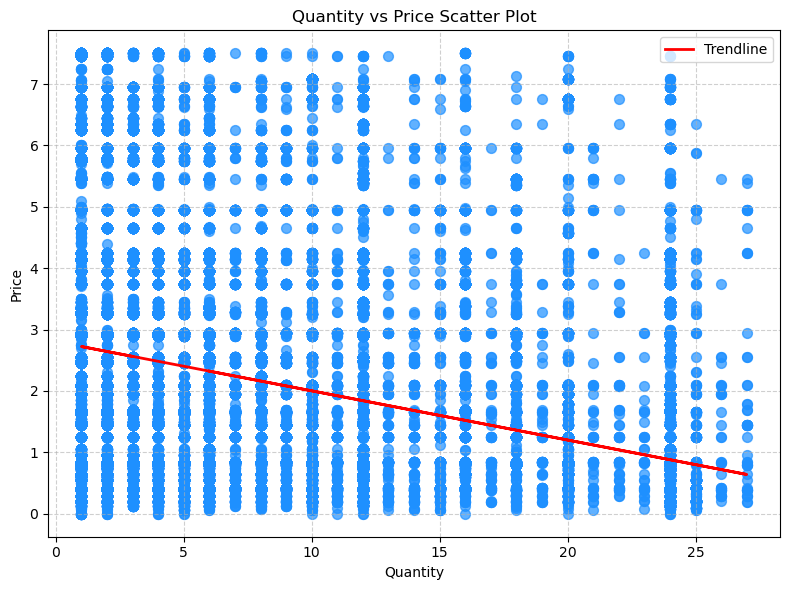

In [22]:
# Plot a scatter chart of quantity vs price for the cleaned retail dataset
retail_2010.scatter_plot(
    x="quantity",
    y="price",
    data=retail_2010_stock,
    title="Quantity vs Price Scatter Plot",
    xlabel="Quantity",
    ylabel="Price",
    trendline=True
)

#### Insights – 2010

- **Top 3 Countries by Sales**
  - The leading countries in sales were the United Kingdom, Germany, and France.
  - Notably, France rose from fourth to third place this year.
  - This shift may reflect increased market penetration, stronger promotional efforts, or seasonal demand patterns specific to French consumers.

- **Top 3 Best-Selling Products**
  - The most sold items in 2010 were stockcodes **85123**, **47566**, and **85099**.
  - Product **85123** has consistently led sales for two consecutive years, indicating strong customer preference or broad applicability.


In [23]:
print((retail_2010.df['price'] == 0 ).sum())

31


#### 2.2.5. Save checked file

In [24]:
retail_2010.df.to_excel(r"..\..\utils\cleaned_retail_2010.xlsx", index=False)

### 2.3. EDA and cleaning of customer df

EDA Results
The dataframe contains 5,942 records across 8 columns.
There are no negative, duplicate, or missing records.

Actions Taken
Normalized column header values to remove extra spaces.

Results
The dataframe headers no longer contain extra spaces.

#### 2.3.1. EDA

In [ ]:

# Normalize column names in the dataframe
customers.normalize_column_names()

# Display basic information about the dataframe
customers.show_basic_information()

# Display statistical summary for 'gender' and 'currency' fields
customers.show_information(["gender", "currency"])

# Display count of missing values per column
customers.show_missing_val()

# Display number of duplicate rows
customers.show_duplicates()

# Note: The following line is commented out and may not apply to 'currency' as a numeric field
# clean_data.show_how_many_negative_values(["currency"])

# Display statistical summary again for 'gender' and 'currency' fields
customers.show_information(["gender", "currency"])


-------------------------------
## Normalizing Headers ##
-------------------------------

['customer_id', 'first_name', 'last_name', 'email', 'gender', 'department', 'currency', 'currency_id'] 


-------------------------------
## DataFrame Basic Information ##
-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  5942 non-null   int64 
 1   first_name   5942 non-null   object
 2   last_name    5942 non-null   object
 3   email        5942 non-null   object
 4   gender       5942 non-null   object
 5   department   5942 non-null   object
 6   currency     5942 non-null   object
 7   currency_id  5942 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 371.5+ KB
None
Row count: 5942
Column count: 8 


-------------------------------
## Statistical Summary ##
-------------------------------

    

### 

#### 2.3.2. Save checked file

In [26]:
customers.df.to_excel(r"..\..\utils\cleaned_customers.xlsx", index=False)